In [1]:
import sys
import math
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
df = pd.read_csv('세진.csv')

In [3]:
df.describe()

,Unnamed: 0,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,고혈압,bmi,비만도,복부비만,고지혈증,당뇨병
count,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,...,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000
mean,500014.03224,1.46612,10.71740,162.09661,63.31306,81.40610,122.78661,76.16233,100.77851,195.47515,...,25.94240,37.24307,1.60551,0.52507,0.77958,23.97117,1.38935,0.24102,0.83627,0.45758
std,288672.45104,0.49885,2.82324,9.34604,12.47524,9.51693,14.58700,9.90451,24.16927,38.91257,...,26.09024,50.17733,0.81558,0.49937,0.74777,3.49633,0.57637,0.42770,0.44253,0.63337
min,0.00000,1.00000,5.00000,125.00000,25.00000,40.00000,63.00000,29.00000,25.00000,30.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,12.48699,1.00000,0.00000,-1.00000,0.00000
25%,249998.00000,1.00000,9.00000,155.00000,55.00000,75.00000,112.00000,70.00000,89.00000,169.00000,...,15.00000,16.00000,1.00000,0.00000,0.00000,21.48438,1.00000,0.00000,1.00000,0.00000
50%,500174.50000,1.00000,11.00000,160.00000,60.00000,81.00000,121.00000,76.00000,96.00000,193.00000,...,20.00000,23.00000,1.00000,1.00000,1.00000,23.87511,1.00000,0.00000,1.00000,0.00000
75%,749948.00000,2.00000,13.00000,170.00000,70.00000,88.00000,131.00000,82.00000,105.00000,219.00000,...,30.00000,40.00000,2.00000,1.00000,1.00000,25.95156,2.00000,0.00000,1.00000,1.00000
max,999999.00000,2.00000,18.00000,190.00000,140.00000,140.00000,273.00000,185.00000,872.00000,2386.00000,...,7210.00000,999.00000,3.00000,1.00000,3.00000,45.71429,3.00000,1.00000,1.00000,2.00000


In [4]:
df.columns

Index(['Unnamed: 0', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레',
       '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
       'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT',
       '감마지티피', '흡연상태', '음주여부', '고혈압', 'bmi', '비만도', '복부비만', '고지혈증', '당뇨병'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.describe()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,고혈압,bmi,비만도,복부비만,고지혈증,당뇨병
count,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,...,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000,1316214.00000
mean,1.46612,10.71740,162.09661,63.31306,81.40610,122.78661,76.16233,100.77851,195.47515,130.78062,...,25.94240,37.24307,1.60551,0.52507,0.77958,23.97117,1.38935,0.24102,0.83627,0.45758
std,0.49885,2.82324,9.34604,12.47524,9.51693,14.58700,9.90451,24.16927,38.91257,95.09747,...,26.09024,50.17733,0.81558,0.49937,0.74777,3.49633,0.57637,0.42770,0.44253,0.63337
min,1.00000,5.00000,125.00000,25.00000,40.00000,63.00000,29.00000,25.00000,30.00000,1.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,12.48699,1.00000,0.00000,-1.00000,0.00000
25%,1.00000,9.00000,155.00000,55.00000,75.00000,112.00000,70.00000,89.00000,169.00000,74.00000,...,15.00000,16.00000,1.00000,0.00000,0.00000,21.48438,1.00000,0.00000,1.00000,0.00000
50%,1.00000,11.00000,160.00000,60.00000,81.00000,121.00000,76.00000,96.00000,193.00000,107.00000,...,20.00000,23.00000,1.00000,1.00000,1.00000,23.87511,1.00000,0.00000,1.00000,0.00000
75%,2.00000,13.00000,170.00000,70.00000,88.00000,131.00000,82.00000,105.00000,219.00000,159.00000,...,30.00000,40.00000,2.00000,1.00000,1.00000,25.95156,2.00000,0.00000,1.00000,1.00000
max,2.00000,18.00000,190.00000,140.00000,140.00000,273.00000,185.00000,872.00000,2386.00000,9490.00000,...,7210.00000,999.00000,3.00000,1.00000,3.00000,45.71429,3.00000,1.00000,1.00000,2.00000


In [7]:
df = df.drop(['고지혈증','식전혈당(공복혈당)'],axis=1)

In [8]:
df.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '고혈압',
       'bmi', '비만도', '복부비만', '당뇨병'],
      dtype='object')

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

array = df.values
X = array[:,0:23]
Y = array[:,23]

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
fit.scores_

array([3.66695124e+03, 5.00000127e+04, 5.78326552e+02, 8.02248207e+04,
       8.97573173e+04, 9.98147298e+04, 4.19907836e+04, 5.58659468e+04,
       3.19940858e+06, 8.68954425e+04, 1.04481614e+05, 2.52708142e+03,
       2.73568372e+03, 8.16610021e+02, 1.57166563e+05, 4.96508368e+05,
       2.62848608e+06, 4.30554236e+03, 7.77814356e+02, 3.42357026e+04,
       2.64410720e+04, 8.59239228e+03, 2.93643792e+04])

In [10]:
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams['axes.grid'] = True

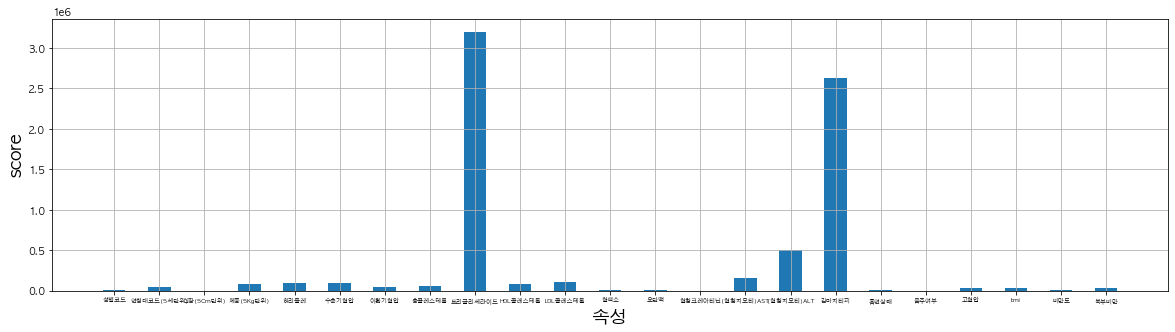

In [11]:
label = np.array(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '고혈압', 'bmi', '비만도', '복부비만'])
index = np.arange(len(label))

plt.bar(index, fit.scores_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.xticks(index, label, fontsize=6)
plt.show()

In [12]:
result = np.c_[label,fit.scores_]
print(result)

[['성별코드' '3666.951241379764']
 ['연령대코드(5세단위)' '50000.01273809724']
 ['신장(5Cm단위)' '578.3265518796421']
 ['체중(5Kg단위)' '80224.82073357915']
 ['허리둘레' '89757.3173145365']
 ['수축기혈압' '99814.72979239929']
 ['이완기혈압' '41990.78361110057']
 ['총콜레스테롤' '55865.946819698875']
 ['트리글리세라이드' '3199408.57619549']
 ['HDL콜레스테롤' '86895.44245472681']
 ['LDL콜레스테롤' '104481.61430562208']
 ['혈색소' '2527.081422406025']
 ['요단백' '2735.6837247663793']
 ['혈청크레아티닌' '816.6100214206325']
 ['(혈청지오티)AST' '157166.56343137304']
 ['(혈청지오티)ALT' '496508.36794887076']
 ['감마지티피' '2628486.0790806087']
 ['흡연상태' '4305.5423621304235']
 ['음주여부' '777.8143563145908']
 ['고혈압' '34235.70256825602']
 ['bmi' '26441.071983383106']
 ['비만도' '8592.39228093576']
 ['복부비만' '29364.37917025668']]


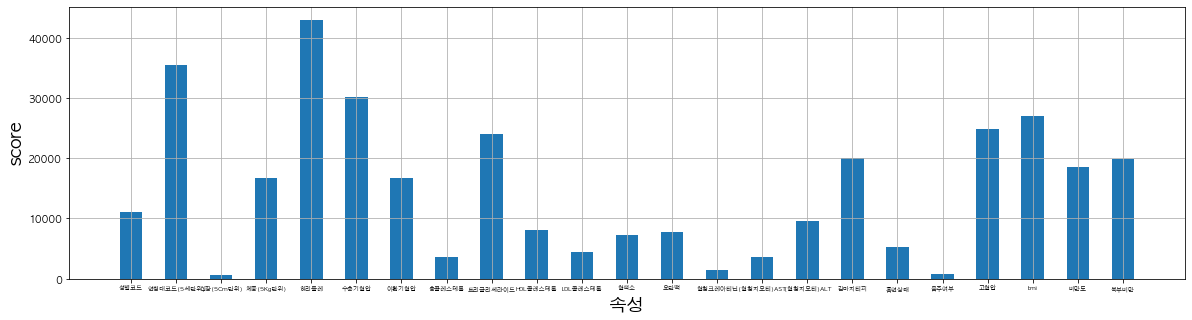

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

array = df.values
X = array[:,0:23]
Y = array[:,23]

selectK = SelectKBest(score_func=f_classif, k='all')
selectK.fit(X,Y)
selectK.scores_

label = np.array(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '고혈압', 'bmi', '비만도', '복부비만'])
index = np.arange(len(label))

plt.bar(index, selectK.scores_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.xticks(index, label, fontsize=6)
plt.show()

In [14]:
result = np.c_[label,selectK.scores_]
print(result)

[['성별코드' '10982.212864427747']
 ['연령대코드(5세단위)' '35424.44211846028']
 ['신장(5Cm단위)' '537.0507213509138']
 ['체중(5Kg단위)' '16733.155147604102']
 ['허리둘레' '42970.68765105992']
 ['수축기혈압' '30117.319375945324']
 ['이완기혈압' '16714.3602198275']
 ['총콜레스테롤' '3625.887779710425']
 ['트리글리세라이드' '23976.49011655769']
 ['HDL콜레스테롤' '8135.89878684559']
 ['LDL콜레스테롤' '4450.982323900357']
 ['혈색소' '7235.298149219335']
 ['요단백' '7799.488628452974']
 ['혈청크레아티닌' '1430.148168082475']
 ['(혈청지오티)AST' '3649.9125815327193']
 ['(혈청지오티)ALT' '9599.286920488406']
 ['감마지티피' '20032.16163942409']
 ['흡연상태' '5237.486600257096']
 ['음주여부' '819.8837385312132']
 ['고혈압' '24763.439671855325']
 ['bmi' '26987.696956868684']
 ['비만도' '18472.130365539728']
 ['복부비만' '19930.536053219144']]


[0.0073315  0.06095788 0.03254134 0.03246331 0.0658197  0.06165906
 0.05950934 0.06434671 0.06747873 0.06225596 0.06429281 0.06331565
 0.01103582 0.05653574 0.06175053 0.06310479 0.06891593 0.0142317
 0.00819507 0.01802876 0.03851395 0.00903574 0.00867995]


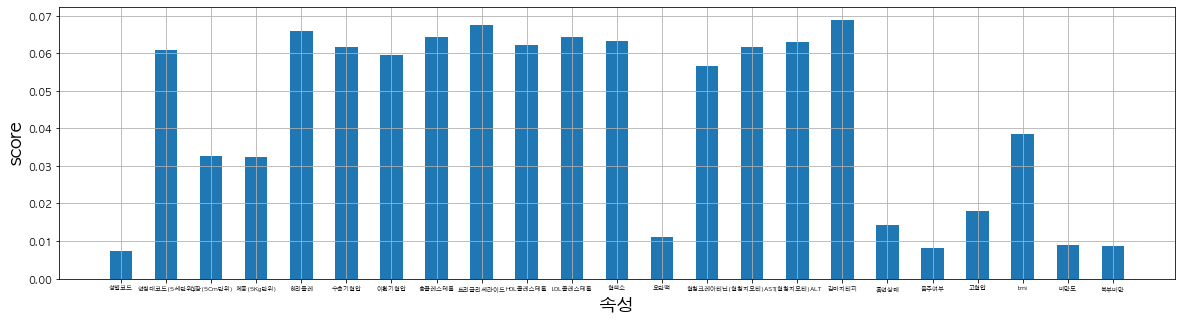

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

array = df.values
X = array[:,0:23]
Y = array[:,23]

etc_model = ExtraTreesClassifier()
etc_model.fit(X, Y)

print(etc_model.feature_importances_)

plt.bar(index, etc_model.feature_importances_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.xticks(index, label, fontsize=6)
plt.show()

In [18]:
result = np.c_[label,etc_model.feature_importances_*1000]
print(result)

[['성별코드' '7.331499316741799']
 ['연령대코드(5세단위)' '60.95788081723432']
 ['신장(5Cm단위)' '32.541342253795285']
 ['체중(5Kg단위)' '32.463312195485386']
 ['허리둘레' '65.81970246595033']
 ['수축기혈압' '61.65905701289216']
 ['이완기혈압' '59.50934097742949']
 ['총콜레스테롤' '64.34671198526202']
 ['트리글리세라이드' '67.4787319555609']
 ['HDL콜레스테롤' '62.255960625331255']
 ['LDL콜레스테롤' '64.29281055684397']
 ['혈색소' '63.31565118082613']
 ['요단백' '11.035820435406004']
 ['혈청크레아티닌' '56.53573636456707']
 ['(혈청지오티)AST' '61.75053205555208']
 ['(혈청지오티)ALT' '63.1047902791735']
 ['감마지티피' '68.91593467111558']
 ['흡연상태' '14.231701602426414']
 ['음주여부' '8.195070469732887']
 ['고혈압' '18.02876340328708']
 ['bmi' '38.51395469277411']
 ['비만도' '9.035742424642732']
 ['복부비만' '8.679952257969584']]


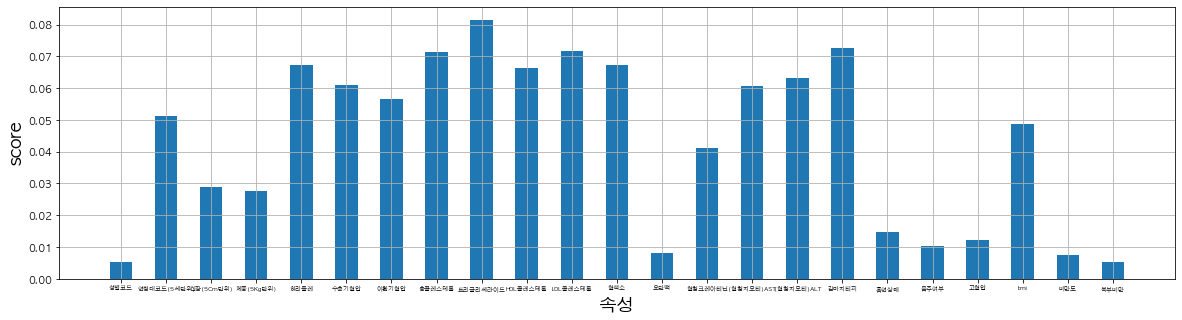

In [21]:
from sklearn.ensemble import RandomForestClassifier

array = df.values
X = array[:,0:23]
Y = array[:,23]

forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X,Y)

plt.bar(index, forest.feature_importances_, width=0.5)
plt.xlabel('속성', fontsize=18)
plt.ylabel('score', fontsize=18)
plt.xticks(index, label, fontsize=6)
plt.show()

In [22]:
result = np.c_[label,forest.feature_importances_*1000]
print(result)

[['성별코드' '5.3573941250790185']
 ['연령대코드(5세단위)' '51.19056069619755']
 ['신장(5Cm단위)' '28.81923548286986']
 ['체중(5Kg단위)' '27.5996442445366']
 ['허리둘레' '67.27834533932845']
 ['수축기혈압' '60.94146927023176']
 ['이완기혈압' '56.69290638209161']
 ['총콜레스테롤' '71.42585385018593']
 ['트리글리세라이드' '81.50663561225002']
 ['HDL콜레스테롤' '66.21121841131306']
 ['LDL콜레스테롤' '71.71846340022354']
 ['혈색소' '67.22408744975539']
 ['요단백' '8.186005414500437']
 ['혈청크레아티닌' '41.125458280775014']
 ['(혈청지오티)AST' '60.75738771700456']
 ['(혈청지오티)ALT' '63.280279727894396']
 ['감마지티피' '72.73547964729407']
 ['흡연상태' '14.551052274528006']
 ['음주여부' '10.278917521749475']
 ['고혈압' '12.035799250455417']
 ['bmi' '48.641049803612425']
 ['비만도' '7.317475948836937']
 ['복부비만' '5.125280149286534']]
